# Machine learning and FinTech Hw 1.                                        0616098 黃秉茂

#### import every module I need

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import math   # This will import math module
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## 1. For your individual final project, think about the following questions and write down your answers. 

### a) What is the topic about FinTech you would like to work out? Briefly explain your problem.

股票買賣<br>
判斷應該是要買多還是賣空、預判漲跌，然後使利潤最大化

### b) Write down your motivations and explain why this topic is important? 

* 動機：個人利益方面，當然是希望所學能幫自己賺錢。社會方面，因為AI在有些方面已經超越人類了，像是圍棋，而運用在財金方面是否能有顯著的提供協助?財金相較於其他領域是更貼近人們的生活的，因此可能對人類的生活產生巨變，而且投資要考量的變數實在很多，所以我很好奇運用AI技術的投資能否打敗人類。
* 重要性：AI已經有發展到一定的程度了，然而運用AI的領域實在不算多，目前可能只有遊戲、視覺、跟自然語言處理有比較傑出的成果，AI勢必還需要在某些能大大改變人們生活的領域發展，更能顯的AI會如何影響人類。如果AI加上財金將會大大地改變人們的生活，而且投資並不是只有考量數學，還是一門跟人文、心理相關的學問，而AI是否能連這些都考慮到是我所好奇的。

### c) Provide at least one related work (paper or book) about the topic.

* ["Global stock market investment strategies based on financial network indicators using machine learning techniques.](https://www.sciencedirect.com/science/article/pii/S0957417418305761) Lee, Tae Kyun, et al. "Global stock market investment strategies based on financial network indicators using machine learning techniques." Expert Systems with Applications 117 (2019): 228-242.
* ["Supporting Investment Management Processes with Machine Learning Techniques."](https://www.researchgate.net/profile/Martin_Sedlmayr/publication/221200937_Unterstutzung_medizinischer_Leitlinien_-_Von_der_zielorientierten_Modellierung_zur_proaktiven_Assistenz/links/0a85e531c2277cd61d000000.pdf#page=275) Groth, Sven S., and Jan Muntermann. "Supporting Investment Management Processes with Machine Learning Techniques." Wirtschaftsinformatik (2). 2009.
* ["A machine learning model for stock market prediction."](https://arxiv.org/ftp/arxiv/papers/1402/1402.7351.pdf) Hegazy, Osman, Omar S. Soliman, and Mustafa Abdul Salam. "A machine learning model for stock market prediction." arXiv preprint arXiv:1402.7351 (2014).
* ["Predicting stock and stock price index movement using trend deterministic data preparation and machine learning techniques."](https://www.sciencedirect.com/science/article/pii/S0957417414004473) Patel, Jigar, et al. "Predicting stock and stock price index movement using trend deterministic data preparation and machine learning techniques." Expert systems with applications 42.1 (2015): 259-268.


### d) Formulate your problem as clear as possible. 

* 起始金額為現金110,000元，希望最後能賺最多錢
* 每天都要判斷買多還是賣多這固定的十檔股票(0050、0056、鴻海、台積電、聯發科、大立光、富邦金、國泰金、玉山金、元大金)
* 自變數會用先前的開盤價、最高價、最低價、收盤價、成交量、5日均價、20日均價、網路聲量(如果有學會爬蟲的話)等等，而變數就是這十檔分別該買還是賣
* 假設想買一定買得到，想脫手一定賣得掉
* 假設股票能以前一天的收盤價買進，融券也是以前一天的收盤價為代價
* 假設手續費為交易金額的1%
* 先預測哪些會漲那些會跌之後，先將現金10,000元保留以備不時之需。在認為漲超過手續費的股票中，覺得投資報酬率最高的投入剩餘現有現金的50%，第二高的再投入剩餘現有現金的50%，以此類推，並將剩餘所有的現有現金投入投資報酬率最低但還是認為能漲超過手續費的，然後隔天要將所有持有的股票都賣掉。認為會跌超過手續費的也是按照買股的方式，在認為跌超過手續費的股票中，覺得賣空的投資報酬率最高的就借價值約為現有現金的50%的券，賣空的投資報酬率第二高的再借價值約為剩餘現有現金的25%的券，以此類推，並在最後借與前一個同價值但還是認為能跌超過手續費的券，然後隔天也要將所有持有的股票都賣掉。隔天都會平倉。
* 可以全部都不買也不賣

### e) Find the data you would like to use. Write down the source of your data, summarize the data set information and attribution information. Provide the exploratory data analysis (EDA) for your data. 

* data source: TEJ, yahoo finance, apple stock
* 會先將.csv下載下來後，再使用pandas, numpy等進行EDA
* stock:
    * 0050 Yuanta Taiwan Top5:  0050 元大台灣50
    * 0056 PTD:                 0056 元大高股息
    * 2317 Hon Hai Precision:   2317 鴻海
    * 2330 TSMC:                2330 台積電
    * 2454 MediaTek:            2454 聯發科
    * 3008 Largan:              3008 大立光
    * 2881 Fubon FHC:           2881 富邦金
    * 2882 Cathay Holdings:     2882 國泰金
    * 2884 E.S.F.H:             2884 玉山金
    * 2885 Yuanta Group:        2885 元大金
* attribute:
    * CO_ID:                  公司代碼 
    * Date:                   年月日 
    * Open(NTD):              開盤價(元) 
    * High(NTD):              最高價(元)
    * Low(NTD):               最低價(元)
    * Close(NTD):             收盤價(元) 
    * Volume(1000S):          成交量(千股)
    * Amount(NTD1000):        成交值(千元)
    * AVG CLOSE:              當日均價(元)
    * AVG CLOSE 5D:           5日均價(元) 
    * AVG CLOSE 10D:          10日均價(元)
    * AVG CLOSE 20D:          20日均價(元)
    * AVG Vol 5D:             5日均量
    * AVG Vol 10D:            10日均量
    * AVG Vol 20D:            20日均量
    * ROI%:                   報酬率％
    * Shares(1000S):          流通在外股數(千股)
    * Market Cap.(NTD MN):    市值(百萬元)
    * P/E-TEJ:                本益比-TEJ 
    * P/B-TEJ:                股價淨值比-TEJ
    * Dividend_Yield%:        股利殖利率
    * Cash_Dividend%:         現金股利率
    * Price_Change(NTD):      股價漲跌(元)
    * High minus Low %:       高低價差%
    * Market:                 上市別
    * Capital:                資本
    * No.of Employee:         員工人數

In [2]:
stock_data = pd.read_csv('stock(eng).csv', encoding='utf-8')
print("dataset_shape = ", stock_data.shape)

dataset_shape =  (14020, 27)


In [3]:
stock_data.head()

,CO_ID,Date,Open(NTD),High(NTD),Low(NTD),Close(NTD),Volume(1000S),Amount(NTD1000),AVG CLOSE,AVG CLOSE 5D,...,Market Cap.(NTD MN),P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Market,Capital,No.of Employee
0,0050 Yuanta Taiwan Top50,2015/1/5,66.4,66.75,66,66.55,"6,295","417,637",66.3379,66.81,...,"75,567",NaN,NaN,NaN,2.33,-0.30,1.1219,TSE,NaN,NaN
1,0050 Yuanta Taiwan Top50,2015/1/6,65.75,65.75,64.75,64.9,"19,501","1,272,547",65.2527,66.47,...,"73,693",NaN,NaN,NaN,2.39,-1.65,1.5026,TSE,NaN,NaN
2,0050 Yuanta Taiwan Top50,2015/1/7,64.7,65.25,64.7,65,"6,991","454,539",65.0127,66.03,...,"73,742",NaN,NaN,NaN,2.38,0.10,0.8475,TSE,NaN,NaN
3,0050 Yuanta Taiwan Top50,2015/1/8,65.5,66.6,65.5,66.5,"13,153","871,151",66.2295,65.96,...,"75,444",NaN,NaN,NaN,2.33,1.50,1.6923,TSE,NaN,NaN
4,0050 Yuanta Taiwan Top50,2015/1/9,66.9,66.95,66.05,66.15,"5,891","391,342",66.4195,65.82,...,"75,047",NaN,NaN,NaN,2.34,-0.35,1.3534,TSE,NaN,NaN


In [4]:
print("is_any_null ", stock_data.isnull().values.any())

is_any_null  True


#### data preprocess for dropping column with lots of NaN or replacing NaN with mean

In [5]:
stock_data = stock_data.dropna(thresh=len(stock_data.index) * 0.8, axis=1)
stock_data = stock_data.fillna(stock_data.mean())

In [6]:
stock_data.head()

,CO_ID,Date,Open(NTD),High(NTD),Low(NTD),Close(NTD),Volume(1000S),Amount(NTD1000),AVG CLOSE,AVG CLOSE 5D,...,Market Cap.(NTD MN),P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Market,Capital,No.of Employee
0,0050 Yuanta Taiwan Top50,2015/1/5,66.4,66.75,66,66.55,"6,295","417,637",66.3379,66.81,...,"75,567",15.044964,2.296988,4.227955,2.33,-0.30,1.1219,TSE,NaN,NaN
1,0050 Yuanta Taiwan Top50,2015/1/6,65.75,65.75,64.75,64.9,"19,501","1,272,547",65.2527,66.47,...,"73,693",15.044964,2.296988,4.227955,2.39,-1.65,1.5026,TSE,NaN,NaN
2,0050 Yuanta Taiwan Top50,2015/1/7,64.7,65.25,64.7,65,"6,991","454,539",65.0127,66.03,...,"73,742",15.044964,2.296988,4.227955,2.38,0.10,0.8475,TSE,NaN,NaN
3,0050 Yuanta Taiwan Top50,2015/1/8,65.5,66.6,65.5,66.5,"13,153","871,151",66.2295,65.96,...,"75,444",15.044964,2.296988,4.227955,2.33,1.50,1.6923,TSE,NaN,NaN
4,0050 Yuanta Taiwan Top50,2015/1/9,66.9,66.95,66.05,66.15,"5,891","391,342",66.4195,65.82,...,"75,047",15.044964,2.296988,4.227955,2.34,-0.35,1.3534,TSE,NaN,NaN


In [7]:
stock_data.tail()

,CO_ID,Date,Open(NTD),High(NTD),Low(NTD),Close(NTD),Volume(1000S),Amount(NTD1000),AVG CLOSE,AVG CLOSE 5D,...,Market Cap.(NTD MN),P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Market,Capital,No.of Employee
14015,2885 Yuanta Group,2020/9/21,18.2,18.25,18,18,"26,320","476,759",18.1137,18.24,...,"218,473",11.4330,0.9541,5.83,3.4722,-0.30,1.3661,TSE,"121,374,359,140","14,223"
14016,2885 Yuanta Group,2020/9/22,17.95,18,17.7,17.75,"30,579","544,932",17.8202,18.14,...,"215,439",11.2742,0.9408,5.92,3.5211,-0.25,1.6667,TSE,"121,374,359,140","14,223"
14017,2885 Yuanta Group,2020/9/23,17.75,17.85,17.65,17.7,"19,604","347,381",17.7191,18.01,...,"214,832",11.2425,0.9382,5.93,3.5311,-0.05,1.1268,TSE,"121,374,359,140","14,223"
14018,2885 Yuanta Group,2020/9/24,17.55,17.55,17.15,17.15,"44,211","763,162",17.2618,17.78,...,"208,157",10.8931,0.9090,6.12,3.6443,-0.55,2.2599,TSE,"121,374,359,140","14,223"
14019,2885 Yuanta Group,2020/9/25,17.25,17.6,17.2,17.3,"26,052","451,970",17.3485,17.58,...,"209,977",10.9884,0.9170,6.07,3.6127,0.15,2.3324,TSE,"121,374,359,140","14,223"


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14020 entries, 0 to 14019
Data columns (total 27 columns):
CO_ID                  14020 non-null object
Date                   14020 non-null object
Open(NTD)              14020 non-null object
High(NTD)              14020 non-null object
Low(NTD)               14020 non-null object
Close(NTD)             14020 non-null object
Volume(1000S)          14020 non-null object
Amount(NTD1000)        14020 non-null object
AVG CLOSE              14012 non-null object
AVG CLOSE 5D           14020 non-null object
AVG CLOSE 10D          14020 non-null object
AVG CLOSE 20D          14020 non-null object
AVG Vol 5D             14020 non-null object
AVG Vol 10D            14020 non-null object
AVG Vol 20D            14020 non-null object
ROI%                   14020 non-null float64
Shares(1000S)          14020 non-null object
Market Cap.(NTD MN)    14020 non-null object
P/E-TEJ                14020 non-null float64
P/B-TEJ                14020 non-n

In [9]:
stock_data.describe()

,ROI%,P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %
count,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000
mean,0.046360,15.044964,2.296988,4.227955,3.663234,0.139675,1.391597
std,1.617399,6.357659,1.845026,1.513258,1.391331,32.966458,1.234087
min,-10.000000,5.530000,0.590000,0.890000,0.000000,-465.000000,0.000000
25%,-0.662300,10.760000,1.110000,3.320000,2.654900,-0.350000,0.659900
50%,0.000000,14.820000,1.660000,4.227955,3.590000,0.000000,1.183400
75%,0.732825,16.240000,2.296988,5.020000,4.540000,0.400000,1.800150
max,10.000000,47.550000,12.200000,11.000000,11.000000,390.000000,12.797600


In [10]:
print(stock_data.nunique())

CO_ID                     10
Date                    1402
Open(NTD)               3224
High(NTD)               3246
Low(NTD)                3280
Close(NTD)              3289
Volume(1000S)          11507
Amount(NTD1000)        13970
AVG CLOSE              13927
AVG CLOSE 5D            7686
AVG CLOSE 10D           9088
AVG CLOSE 20D           9956
AVG Vol 5D             13999
AVG Vol 10D            13997
AVG Vol 20D            14002
ROI%                    8062
Shares(1000S)           1198
Market Cap.(NTD MN)     6911
P/E-TEJ                 3977
P/B-TEJ                 2794
Dividend_Yield%          787
Cash_Dividend%          3323
Price_Change(NTD)        476
High minus Low %        6099
Market                     1
Capital                    8
No.of Employee             8
dtype: int64


In [11]:
stock_data_cols = stock_data.columns
stock_data_cols_set = set(stock_data_cols)
stock_data_cols_list = list(stock_data_cols_set)
stock_data_continuous_variables_cols = stock_data._get_numeric_data().columns
stock_data_continuous_variables_cols_set = set(stock_data_continuous_variables_cols)
stock_data_continuous_variables_cols_list = list(stock_data_continuous_variables_cols_set)
print("stock_data_continuous_variables: ", stock_data_continuous_variables_cols_list)
stock_data_categorical_variables_cols_set = stock_data_cols_set - stock_data_continuous_variables_cols_set
stock_data_categorical_variables_cols_list = list(stock_data_categorical_variables_cols_set)
print("stock_data_categorical_variables:", stock_data_categorical_variables_cols_list)

stock_data_continuous_variables:  ['Cash_Dividend%', 'P/E-TEJ', 'High minus Low %', 'ROI%', 'P/B-TEJ', 'Dividend_Yield%', 'Price_Change(NTD)']
stock_data_categorical_variables: ['CO_ID', 'AVG Vol 5D', 'AVG CLOSE', 'Open(NTD)', 'Volume(1000S)', 'AVG Vol 20D', 'AVG CLOSE 10D', 'Capital', 'Low(NTD)', 'Market', 'Market Cap.(NTD MN)', 'Date', 'AVG CLOSE 20D', 'AVG CLOSE 5D', 'High(NTD)', 'Shares(1000S)', 'No.of Employee', 'AVG Vol 10D', 'Amount(NTD1000)', 'Close(NTD)']


#### frequency tables

In [12]:
[print(f'categorical variable: {i}\n{stock_data[i].value_counts()}\n') for i in stock_data_categorical_variables_cols_list]

categorical variable: CO_ID
2317 Hon Hai Precision      1402
3008 Largan                 1402
0050 Yuanta Taiwan Top50    1402
0056 PTD                    1402
2885 Yuanta Group           1402
2330 TSMC                   1402
2454 MediaTek               1402
2882 Cathay Holdings        1402
2881 Fubon FHC              1402
2884 E.S.F.H                1402
Name: CO_ID, dtype: int64

categorical variable: AVG Vol 5D
3,353.52     2
2,351.09     2
8,149.17     2
12,761.60    2
463.24       2
            ..
27,065.85    1
31,751.59    1
640.952      1
654.338      1
36,969.93    1
Name: AVG Vol 5D, Length: 13999, dtype: int64

categorical variable: AVG CLOSE
45.1193     2
11.2927     2
17.2171     2
25.1519     2
249.235     2
           ..
20.2573     1
18.9903     1
184.4342    1
26.6368     1
49.3471     1
Name: AVG CLOSE, Length: 13927, dtype: int64

categorical variable: Open(NTD)
18.4     42
18.3     41
18.25    39
18.5     34
13       32
         ..
3,240     1
26.81     1
342       

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### relative frequency tables

In [13]:
[print(f'categorical variable: {i}\n{stock_data[i].value_counts(normalize=True, sort=True)}\n') for i in stock_data_categorical_variables_cols_list]

categorical variable: CO_ID
2317 Hon Hai Precision      0.1
3008 Largan                 0.1
0050 Yuanta Taiwan Top50    0.1
0056 PTD                    0.1
2885 Yuanta Group           0.1
2330 TSMC                   0.1
2454 MediaTek               0.1
2882 Cathay Holdings        0.1
2881 Fubon FHC              0.1
2884 E.S.F.H                0.1
Name: CO_ID, dtype: float64

categorical variable: AVG Vol 5D
3,353.52     0.000143
2,351.09     0.000143
8,149.17     0.000143
12,761.60    0.000143
463.24       0.000143
               ...   
27,065.85    0.000071
31,751.59    0.000071
640.952      0.000071
654.338      0.000071
36,969.93    0.000071
Name: AVG Vol 5D, Length: 13999, dtype: float64

categorical variable: AVG CLOSE
45.1193     0.000143
11.2927     0.000143
17.2171     0.000143
25.1519     0.000143
249.235     0.000143
              ...   
20.2573     0.000071
18.9903     0.000071
184.4342    0.000071
26.6368     0.000071
49.3471     0.000071
Name: AVG CLOSE, Length: 13927, dtyp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### bar plots

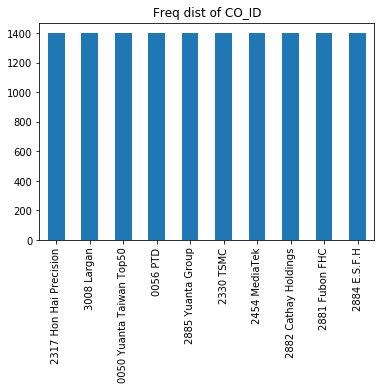

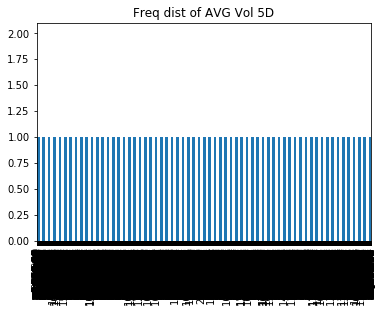

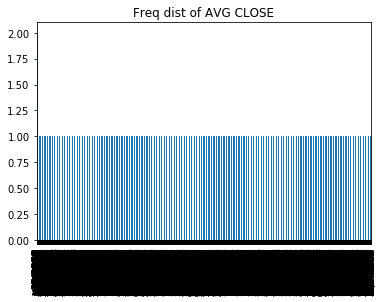

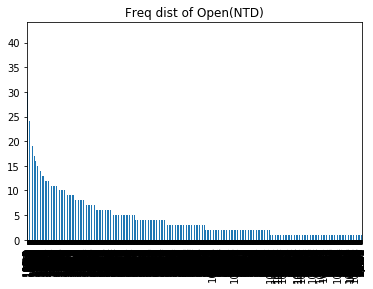

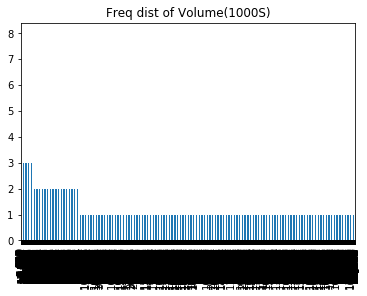

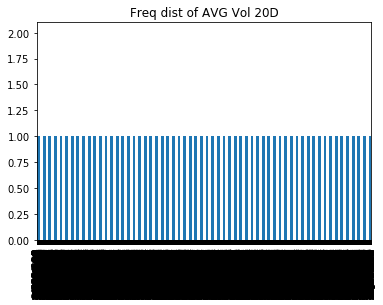

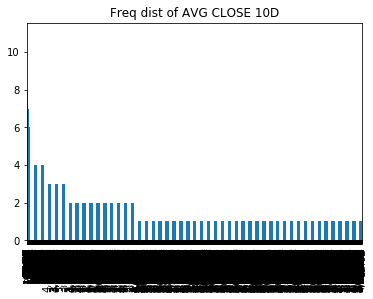

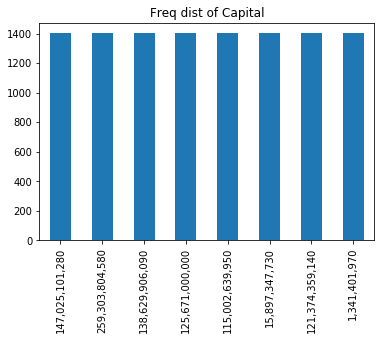

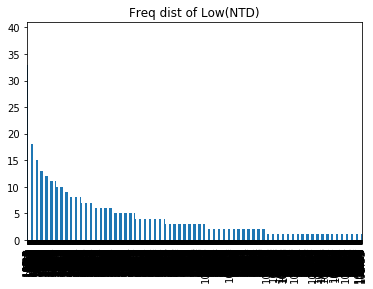

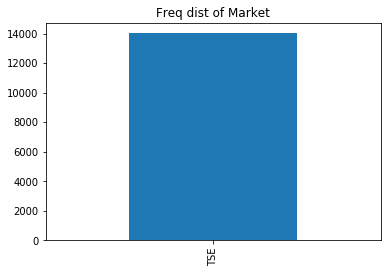

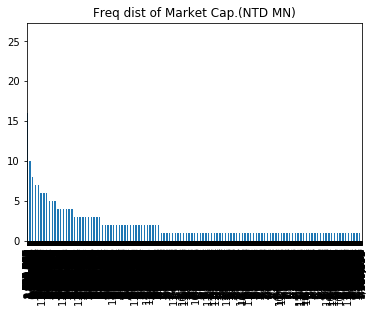

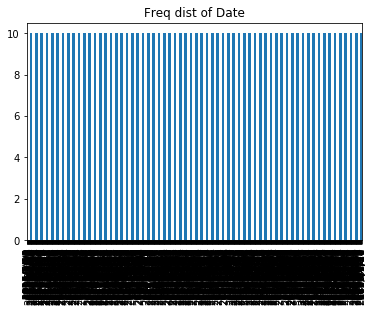

In [ ]:
# [stock_data[i].value_counts().plot.bar(title=f'Freq dist of {i}') for i in stock_data_categorical_variables_cols_list]
for stock_data_categorical_variables_col in stock_data_categorical_variables_cols_list:
    stock_data[stock_data_categorical_variables_col].value_counts().plot.bar()
    plt.title(f'Freq dist of {stock_data_categorical_variables_col}')
    # plt.savefig(f'bar{stock_data_categorical_variables_col}.png')
    plt.show()

#### histograms

In [ ]:
for stock_data_continuous_variables_col in stock_data_continuous_variables_cols_list: 
    stock_data[stock_data_continuous_variables_col].hist(figsize= (8, 8), bins= 100)
    plt.title(stock_data_continuous_variables_col)
    # plt.savefig(f'hist{stock_data_continuous_variables_col}.png')
    plt.show()

#### distribution plots

In [ ]:
fig, ax = plt.subplots(len(stock_data_continuous_variables_cols_list), figsize=(16, 30))
for stock_data_idx, stock_data_continuous_variables_col in enumerate(stock_data_continuous_variables_cols_list):
    sns.distplot(stock_data[stock_data_continuous_variables_col], hist=True, ax=ax[stock_data_idx])
    ax[stock_data_idx].set_title('Freq dist '+ stock_data_continuous_variables_col, fontsize=20)
    ax[stock_data_idx].set_xlabel(stock_data_continuous_variables_col, fontsize=10)
    ax[stock_data_idx].set_ylabel('Count', fontsize=10)
plt.show()

#### pairwise scatterplots

In [ ]:
sns.pairplot(stock_data[stock_data_continuous_variables_cols_list])
plt.show()

#### heatmap

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(stock_data.corr(), annot=False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
#plt.savefig('heatmap.png')
plt.show()

## 2. Please download the adult dataset and practice how to conduct exploratory data analysis. 

#### read csv in jupyter notebook

In [ ]:
dataset = pd.read_csv('adult.csv')

#### Viewing/inspecting data

In [ ]:
print("dataset_shape = ", dataset.shape)

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

In [ ]:
dataset.info()

#### data preprocess, add column names

In [ ]:
attribute_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annual-income']

In [ ]:
dataset = pd.read_csv('adult.csv', header=None, names=attribute_name)

In [ ]:
print("dataset_shape = ", dataset.shape)

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

In [ ]:
dataset.info()

### 1. Show the summary statistics of all numerical variables. 

In [ ]:
dataset.describe()

In [ ]:
print(dataset.nunique())

### 2. Identify categorical and continuous variables. 

In [ ]:
cols = dataset.columns
continuous_variables_cols = dataset._get_numeric_data().columns

#### continuous variables

In [ ]:
continuous_variables_cols_set = set(continuous_variables_cols)

In [ ]:
continuous_variables_cols_list = list(continuous_variables_cols_set)
print("continuous_variables:", continuous_variables_cols_list)

#### categorical variables

In [ ]:
categorical_variables_cols_set = set(cols) - set(continuous_variables_cols)

In [ ]:
categorical_variables_cols_list = list(categorical_variables_cols_set)
print("categorical_variables:", categorical_variables_cols_list)

### 3. For each categorical variable, print frequency and relative frequency tables. 

#### frequency tables

In [ ]:
[print(f'categorical variable: {i}\n{dataset[i].value_counts()}\n') for i in categorical_variables_cols_list]

#### relative frequency tables

In [ ]:
[print(f'categorical variable: {i}\n{dataset[i].value_counts(normalize=True, sort=True)}\n') for i in categorical_variables_cols_list]

### 4. Draw bar plots for each categorical variable. 

In [ ]:
# [dataset[i].value_counts().plot.bar(title=f'Freq dist of {i}') for i in categorical_variables_cols_list]
for categorical_variables_col in categorical_variables_cols_list:
    dataset[categorical_variables_col].value_counts().plot.bar()
    plt.title(f'Freq dist of {categorical_variables_col}')
    # plt.savefig(f'bar{categorical_variables_col}.png')
    plt.show()

### 5. For each continuous variable, draw histograms and distribution plots. 

#### histograms

In [ ]:
# method1
for continuous_variables_col in continuous_variables_cols_list: 
    dataset[continuous_variables_col].hist(figsize= (8, 8), bins= 100)
    plt.title(continuous_variables_col)
    # plt.savefig(f'hist{continuous_variables_col}.png')
    plt.show()

In [ ]:
# method2
dataset.hist()

#### distribution plots

In [ ]:
fig, ax = plt.subplots(len(continuous_variables_cols_list), figsize=(16, 30))
for idx, continuous_variables_col in enumerate(continuous_variables_cols_list):
    sns.distplot(dataset[continuous_variables_col], hist=True, ax=ax[idx])
    ax[idx].set_title('Freq dist '+ continuous_variables_col, fontsize=20)
    ax[idx].set_xlabel(continuous_variables_col, fontsize=10)
    ax[idx].set_ylabel('Count', fontsize=10)
plt.show()

### 6. Draw pairwise scatterplots for continuous variables. Explain any discernable patterns? 

In [ ]:
# method1
sns.pairplot(dataset[continuous_variables_cols_list])
plt.show()

In [ ]:
# method2
for continuous_variables_col2 in continuous_variables_cols_list:
    for continuous_variables_col1 in continuous_variables_cols_list: 
        plt.scatter(dataset[continuous_variables_col1], dataset[continuous_variables_col2])       
        plt.xlabel(f'{continuous_variables_col1}')
        plt.ylabel(f'{continuous_variables_col2}')
        plt.show()

* capital-gain和capital-loss呈現L型，因為兩者一至少有一個為0(因兩者有互斥性質)
* capital-gain當一軸時，中間通常是空掉的
* 有些的分布情形是佈滿圖，而有些是點大部分接近於兩軸

### 7. Draw a heatmap for the correlations among all variables. What do you observe? 

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
#plt.savefig('heatmap.png')
plt.show()

* correlation是pairwise
* only continuous variables, no categorical variables
* 自己和自己的block一定是紅色(因為correlation = 1)
* fnlwgt和大部分都無相關
* education-num算是和大部分的其他變數最相關的
* capital-gain和capital-loss幾乎為0，因為兩者一至少有一個為0(因兩者有互斥性質)